In [1]:
import random
from tqdm import tqdm
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
def celsius_to_fahrenheit(celsius):
    """Convert Celsius to Fahrenheit."""
    return (celsius * 1.8) + 32

def distance_to_optimal(point):
    """Calculate the Euclidean distance to the optimal point (1.8, 32)."""
    optimal_point = (1.8, 32)
    return ((point[0] - optimal_point[0])**2 + 
            (point[1] - optimal_point[1])**2)**0.5

def random_point():
    """Generate a random point within specified bounds."""
    return (random.randrange(-5, 5), random.randrange(-50, 50))

def clip_to_bounds(value, lower_bound, upper_bound):
    """Clip a value to be within a specified range."""
    return max(lower_bound, min(value, upper_bound))

In [3]:
def bat_algorithm(iterations, A, alpha, gamma, fmin, fmax, 
                  early_stop_threshold=1e-1, early_stop_patience=1):
    """
    Run the Bat Algorithm for optimization.

    Parameters:
    - iterations (int): The total number of iterations.
    - A (float): Loudness parameter, controls the amplitude of emitted sound waves.
    - alpha (float): Pulse rate parameter, influences the speed of bats.
    - gamma (float): Rate of loudness decay, affects the decay in loudness.
    - fmin (float): Minimum frequency, part of the frequency range of emitted sound waves.
    - fmax (float): Maximum frequency, part of the frequency range of emitted sound waves.
    - early_stop_threshold (float): Threshold for early stopping based on change in objective function.
    - early_stop_patience (int): Number of consecutive iterations with change below threshold to trigger early stopping.

    Returns:
    - x (list): List of x-coordinates of the current solutions.
    - y (list): List of y-coordinates of the current solutions.
    - z (list): List of distances to the optimal point during optimization.
    - best_point (tuple): Optimal solution found during the optimization.
    """
    # Initialize variables
    current_point = random_point()
    best_point = current_point  # Track the best solution
    x, y, z = [], [], []

    # Initialize early stopping parameters
    consecutive_below_threshold = 0
    prev_distance = float('inf')

    # Main optimization loop
    for iteration in tqdm(range(iterations), 
                          desc="Optimizing", unit="iteration"):
        # Update frequency and velocity
        frequency = fmin + (fmax - fmin) * random.uniform(0.1, 0.9)
        velocity = (-(current_point[0] - 1.8), -(current_point[1] - 32))
        random_vector = (random.randrange(-1, 1), random.randrange(-1, 1))

        # Update current point based on emitted sound waves and velocity
        current_point = (
            current_point[0] + velocity[0] * frequency,
            current_point[1] + velocity[1] * frequency
        )

        # Apply random walk for exploration
        if random.uniform(0, 1) > A:
            new_point = (
                current_point[0] + alpha * random_vector[0],
                current_point[1] + alpha * random_vector[1]
            )
            
            # Clip the new position to specified bounds
            new_point = (clip_to_bounds(new_point[0], -5, 5),
                          clip_to_bounds(new_point[1], -50, 50))
            current_point = new_point

        # Update based on the objective function (distance to optimal)
        rp = random_point()
        if distance_to_optimal(
            current_point
            ) < distance_to_optimal(
                best_point
                ):
            best_point = current_point

        # Record the current coordinates and distance to optimal
        x.append(current_point[0])
        y.append(current_point[1])
        z.append(distance_to_optimal(current_point))

        # Check for early stopping
        current_distance = distance_to_optimal(current_point)
        change_in_distance = abs(prev_distance - current_distance)

        if change_in_distance < early_stop_threshold:
            consecutive_below_threshold += 1
        else:
            consecutive_below_threshold = 0  # Reset counter if there is a significant change

        if consecutive_below_threshold >= early_stop_patience:
            print(f"Early stopping triggered at iteration {iteration}.")
            break

        prev_distance = current_distance

    return x, y, z, best_point

In [4]:
# Run the bat algorithm with early stopping for multiple iterations
b1x, b1y, b1z, best_solution1 = bat_algorithm(iterations=50, A=0.1, alpha=0.1,
                                               gamma=0.9, fmin=0, fmax=1)
b2x, b2y, b2z, best_solution2 = bat_algorithm(iterations=50, A=0.1, alpha=0.1,
                                               gamma=0.9, fmin=0.5, fmax=1)
b3x, b3y, b3z, best_solution3 = bat_algorithm(iterations=50, A=0.1, alpha=0.1,
                                               gamma=0.9, fmin=0, fmax=2)
b4x, b4y, b4z, best_solution4 = bat_algorithm(iterations=50, A=0.1, alpha=0.1,
                                               gamma=0.9, fmin=0.5, fmax=2)

# Display the optimal solution
print("Optimal Solution 1:", best_solution1)
print("Optimal Solution 2:", best_solution2)
print("Optimal Solution 3:", best_solution3)
print("Optimal Solution 4:", best_solution4)

Optimizing:   8%|▊         | 4/50 [00:00<00:00, 5542.52iteration/s]


Early stopping triggered at iteration 4.


Optimizing:  12%|█▏        | 6/50 [00:00<00:00, 10188.59iteration/s]


Early stopping triggered at iteration 6.


Optimizing:   4%|▍         | 2/50 [00:00<00:00, 9300.01iteration/s]


Early stopping triggered at iteration 2.


Optimizing:  12%|█▏        | 6/50 [00:00<00:00, 22692.36iteration/s]

Early stopping triggered at iteration 6.
Optimal Solution 1: (1.5091890097459497, 32.06323508769391)
Optimal Solution 2: (1.7635004835536325, 31.99381336178884)
Optimal Solution 3: (1.8000745503106321, 32.026434112453664)
Optimal Solution 4: (1.8671679907378373, 32.051231573175265)


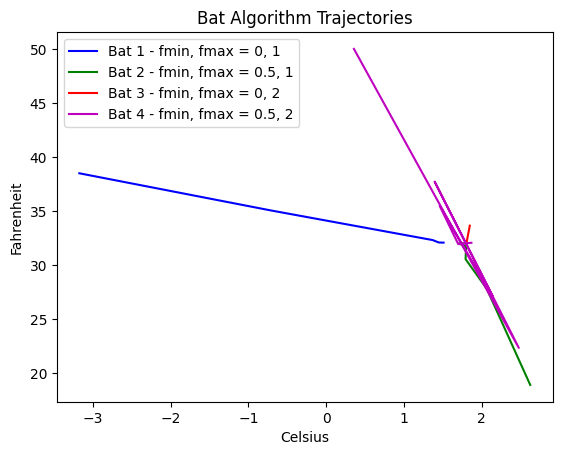

In [5]:
# Plot the trajectories
plt.plot(b1x, b1y, c='b', label='Bat 1 - fmin, fmax = 0, 1')
plt.plot(b2x, b2y, c='g', label='Bat 2 - fmin, fmax = 0.5, 1')
plt.plot(b3x, b3y, c='r', label='Bat 3 - fmin, fmax = 0, 2')
plt.plot(b4x, b4y, c='m', label='Bat 4 - fmin, fmax = 0.5, 2')
plt.title('Bat Algorithm Trajectories')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.show()

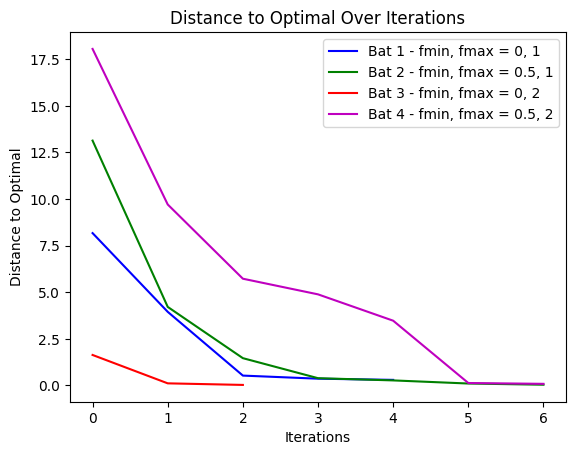

In [6]:
# Plot the distances to optimal over iterations
plt.plot(b1z, c='b', label='Bat 1 - fmin, fmax = 0, 1')
plt.plot(b2z, c='g', label='Bat 2 - fmin, fmax = 0.5, 1')
plt.plot(b3z, c='r', label='Bat 3 - fmin, fmax = 0, 2')
plt.plot(b4z, c='m', label='Bat 4 - fmin, fmax = 0.5, 2')
plt.title('Distance to Optimal Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance to Optimal')
plt.legend()
plt.show()

In [7]:
# Create an interactive 3D scatter plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=b1x, y=b1y, z=b1z, 
                           marker=dict(color='blue'), name='Bat 1 - fmin, fmax = 0, 1'))
fig.add_trace(go.Scatter3d(x=b2x, y=b2y, z=b2z, 
                           marker=dict(color='green'), name='Bat 2 - fmin, fmax = 0.5, 1'))
fig.add_trace(go.Scatter3d(x=b3x, y=b3y, z=b3z, 
                           marker=dict(color='red'), name='Bat 3 - fmin, fmax = 0, 2'))
fig.add_trace(go.Scatter3d(x=b4x, y=b4y, z=b4z, 
                           marker=dict(color='magenta'), name='Bat 4 - fmin, fmax = 0.5, 2'))

# Mark the optimal solutions with stars (using a modified marker style)
fig.add_trace(go.Scatter3d(x=[best_solution1[0]], y=[best_solution1[1]], 
                           z=[distance_to_optimal(best_solution1)],
                           marker=dict(color='blue', 
                                       size=8, 
                                       symbol='x'), 
                           name='Optimal Solution 1'))
fig.add_trace(go.Scatter3d(x=[best_solution2[0]], y=[best_solution2[1]], 
                           z=[distance_to_optimal(best_solution2)],
                           marker=dict(color='green', 
                                       size=8, 
                                       symbol='x'), 
                           name='Optimal Solution 2'))
fig.add_trace(go.Scatter3d(x=[best_solution3[0]], y=[best_solution3[1]], 
                           z=[distance_to_optimal(best_solution3)],
                           marker=dict(color='red', 
                                       size=8, 
                                       symbol='x'), 
                           name='Optimal Solution 3'))
fig.add_trace(go.Scatter3d(x=[best_solution4[0]], y=[best_solution4[1]], 
                           z=[distance_to_optimal(best_solution4)],
                           marker=dict(color='magenta', 
                                       size=8, 
                                       symbol='x'), 
                           name='Optimal Solution 4'))

fig.update_layout(scene=dict(xaxis_title='Celsius', yaxis_title='Fahrenheit', zaxis_title='Distance to Optimal'))

fig.show()